Copyright: Vrije Universiteit Amsterdam, Faculty of Humanities, CLTL

# Lab 2.1: Data Processing

In the previous lab, we stored our results as CSV, TSV, and JSON files. In this lab, we learn how to process the results with the *pandas* library. We see examples about accessing and filtering values and discuss the role of missing values for the dataset statistics. Pandas is an extremely useful library, but it can sometimes be difficult to achieve what you want.

**You should always plan in more time than you anticipate for transforming your data into the right format!** 

## 1. Read data

Pandas presents the content as a data frame (often abbreviated df). By default, the rows and columns are numbered with an index (starting at 0), but it is also possible to provide names for them. In our case, the header provides names for the columns. 

We read in the two example datasets. **Examine the structure of the data frame.**

In [5]:
import pandas as pd
import stanza 

tsv_file = "../data/veganism_overview_en.tsv"
news_content = pd.read_csv(tsv_file, sep="\t", header = 0)
# The separator (sep) is a tabulator, and the first line should be interpreted as the header
news_content = pd.read_csv(tsv_file, sep="\t", header = 0)

# Read in JSON 
json_file = "../data/twitter_results_veganism.json"
twitter_content = pd.read_json(json_file)

# Take a look at the data
#print(news_content[:5])
print(twitter_content[:5])

                 created_at                   id               id_str  \
0 2020-09-09 07:00:38+00:00  1303589112251731968  1303589112251731968   
1 2020-09-08 21:49:25+00:00  1303450394346041344  1303450394346041344   
2 2020-09-08 21:29:50+00:00  1303445466064007169  1303445466064007168   
3 2020-09-08 18:05:34+00:00  1303394059508015104  1303394059508015104   
4 2020-09-08 18:04:44+00:00  1303393850204008449  1303393850204008448   

                                           full_text  truncated  \
0  @RedbirdEl Tried watermelon burgers yesterday....      False   
1  Jonathan and I have launched the Void Wave pod...      False   
2  Yes! These #highlyconsciousbeings belong in th...      False   
3  Some times it's nice to take a break from soci...      False   
4  Stop animal cruelty!\nStop specisizm!\n\nStop ...      False   

  display_text_range                                           entities  \
0          [11, 258]  {'hashtags': [{'text': 'LaborDay', 'indices': ...   
1       

In [6]:
print(news_content[0:5])

  Publication Date       Time           Publisher  \
0       2020-09-15  18:20:00Z  newsindiatimes.com   
1       2020-09-15  10:02:50Z             VegNews   
2       2020-09-10  20:17:56Z            BBC News   
3       2020-09-15  13:08:32Z          Healthline   
4       2020-09-04  07:00:00Z       Green Matters   

                             Author  \
0                          Ela Dutt   
1                               NaN   
2  https://www.facebook.com/bbcnews   
3            Lauren Panoff, MPH, RD   
4                            sophie   

                                               Title  \
0                    Veganism: From fad to lifestyle   
1  Interest in Veganism Hits All-Time High in 202...   
2    Why black Americans are more likely to be vegan   
3                                  Is Beeswax Vegan?   
4  Opinion: Miley Cyrus Says She's No Longer Vega...   

                                                 URL  \
0  https://www.newsindiatimes.com/veganism-from-f... 

In [7]:
news_content.size

336

In [8]:
news_content.shape

(48, 7)

**What do size and shape indicate?**

## 2. Accessing values 

We often only want to perform operations on a subset of the data without deleting the rest. We can access the data using the index (with *iloc*) or the names (with *loc*). If you leave out the indicator for the column, the whole row is displayed. If you want to show all rows, use the : symbol. This is generally used to indicate the full range of a list. 

We only provide a few examples, but **it is important to practice different ways to access the data that you are interested in.**

In [9]:
# Get row 5, column 2
news_content.iloc[5,2]

# If you add additional brackets, the output looks nicer:
# news_content.iloc[[5],[2]]

'IrishCentral'

In [10]:
# Get the column "Title" from row 5 
news_content.loc[5,"Title"]

'Ireland ranked among top ten countries globally for veganism'

In [11]:
# Get row 3 
# news_content.loc[3]

# Nicer formatting
news_content.iloc[[3]]

,Publication Date,Time,Publisher,Author,Title,URL,Text
3,2020-09-15,13:08:32Z,Healthline,"Lauren Panoff, MPH, RD",Is Beeswax Vegan?,https://www.healthline.com/nutrition/is-beeswa...,A vegan diet is defined as a way of eating tha...


In [12]:
# Get the 2nd column from all rows 
news_content.iloc[:,2]

0           newsindiatimes.com
1                      VegNews
2                     BBC News
3                   Healthline
4                Green Matters
5                 IrishCentral
6           BBC Focus Magazine
7                Deccan Herald
8            Green Queen Media
9                     Euronews
10             Cherwell Online
11            Plant Based News
12         Daily Trojan Online
13           Green Queen Media
14          New Zealand Herald
15            USA Today 10Best
16                    The Beet
17            Plant Based News
18            Plant Based News
19          The Jerusalem Post
20                  Civil Eats
21               Las Vegas Sun
22                    Euronews
23        Eco Warrior Princess
24                  Grit Daily
25            Plant Based News
26                    The Beet
27          Totally Vegan Buzz
28               Yahoo Finance
29               The New Daily
30            Plant Based News
31              Times of India
32    So

## 3. Accessing columns

We often want to access the columns of a data frame. We can do that by using the name of the column. 

Sometimes, we just want to work with a subset of the dataset. We can indicate which columns to keep in a list. 

In [13]:
# Different ways of accessing columns
# news_content["Title"]
# news_content["Title"][3:8]

content_subset = news_content[["Publisher","Author","Title"]]
print(content_subset[0:3])

            Publisher                            Author  \
0  newsindiatimes.com                          Ela Dutt   
1             VegNews                               NaN   
2            BBC News  https://www.facebook.com/bbcnews   

                                               Title  
0                    Veganism: From fad to lifestyle  
1  Interest in Veganism Hits All-Time High in 202...  
2    Why black Americans are more likely to be vegan  


## 4. Filtering

A very powerful tool is the option to filter a pandas dataframe using boolean values. 

**Make sure you understand the difference between step 1 and 2 by trying different conditions and outputting the results.** 

In [14]:
# Filter by Date
# 1. This statement returns a data frame with boolean values indicating whether the row fulfills the condition
is_september15 = news_content["Publication Date"] == "2020-09-15"

# 2. We can filter our data frame with the boolean data frame. 
september15_extract = news_content[news_content["Publication Date"] == "2020-09-15"]
#print(september15_extract)

We provide examples for conditioning on substrings or numbers. **Try out other filters.**

You can create complex filters by combining different conditions. Keep in mind that your code should be readable (also for yourself!). Sometimes it is clearer if you apply simple filters in two steps than combining them into one complex step.   

In [15]:
# Search for substrings
is_question = news_content[news_content["Title"].str.contains("?", regex = False)]
is_question

,Publication Date,Time,Publisher,Author,Title,URL,Text
3,2020-09-15,13:08:32Z,Healthline,"Lauren Panoff, MPH, RD",Is Beeswax Vegan?,https://www.healthline.com/nutrition/is-beeswa...,A vegan diet is defined as a way of eating tha...
4,2020-09-04,07:00:00Z,Green Matters,sophie,Opinion: Miley Cyrus Says She's No Longer Vega...,https://www.greenmatters.com/p/miley-cyrus-no-...,Miley Cyrus just announced that she is no long...
17,2020-09-09,11:05:25Z,Plant Based News,Louisa Kendal at Viva!,As Stars Ditch Veganism - Does Celebrity Cultu...,https://www.plantbasednews.org/opinion/celebri...,Does celebrity culture hurt the vegan movement...
20,2020-08-26,07:00:00Z,Civil Eats,NaN,Is the Vegan Movement Ready to Reckon with Rac...,https://civileats.com/2020/08/26/is-the-vegan-...,NaN
36,2020-09-15,13:08:32Z,Healthline,"Alina Petre, MS, RD (NL)",Incomplete Protein: Is It a Concern?,https://www.healthline.com/nutrition/incomplet...,Plant-based sources of protein are often deeme...
42,2020-09-14,14:00:00Z,The Canberra Times,Karen Hardy,Do vegans dream of greasy junk food? If you do...,https://www.canberratimes.com.au/story/6920100...,This is the anti-vegan cookbook for vegans. Al...
44,2020-07-16,12:00:00Z,The Washington Post,By Carrie Dennett,Veganism and eating disorders: Is there a link?,https://www.washingtonpost.com/lifestyle/welln...,Vegan diets — which exclude all foods of anima...
47,2020-05-07,07:00:00Z,Healthline,"Alina Petre, MS, RD (NL)",Do Vegans Live Longer Than Non-Vegans?,https://www.healthline.com/nutrition/do-vegans...,The Western diet and lifestyle are often viewe...


In [16]:
# Evaluate numbers
popular = twitter_content[twitter_content["favorite_count"] > 3]
popular

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status
6,2020-09-08 11:56:40+00:00,1303301222884139009,1303301222884139008,We know that children's skin can be incredibly...,False,"[0, 249]","{'hashtags': [{'text': 'BackToSchoolSafely', '...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,4,False,False,en,0.0,"{'media': [{'id': 1303300172152217601, 'id_str...",NaN,NaN,NaN
9,2020-09-07 18:13:16+00:00,1303033612145750019,1303033612145750016,When children are not brought up in violence b...,False,"[0, 217]","{'hashtags': [{'text': 'Vegan', 'indices': [19...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,190,404,False,False,en,0.0,"{'media': [{'id': 1303033578226360325, 'id_str...",NaN,NaN,NaN
14,2020-09-07 12:55:59+00:00,1302953764471660548,1302953764471660544,New book by my favorite author @chocochilinet ...,False,"[0, 278]","{'hashtags': [{'text': 'vegan', 'indices': [26...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,7,20,False,False,en,0.0,"{'media': [{'id': 1302953753809743872, 'id_str...",NaN,NaN,NaN
18,2020-09-06 14:59:27+00:00,1302622446177136640,1302622446177136640,Discover The YourZooki Liposomal Vitamin C Wit...,False,"[0, 257]","{'hashtags': [{'text': 'VitaminC', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,44,5,False,False,en,0.0,"{'media': [{'id': 1302622443853541384, 'id_str...",NaN,NaN,NaN


## 5. Basic statistics

The function *describe* provides basic statistics about the data frame. 

**Try to interpret the output. What do top and freq refer to? Are the categories meaningful for text data? Can you trust that there are no duplicates if count and unique are equal?**

In [17]:
news_content.describe()

,Publication Date,Time,Publisher,Author,Title,URL,Text
count,48,48,48,30,48,48,34
unique,20,34,36,24,48,48,34
top,2020-09-15,07:00:00Z,Plant Based News,Maria Chiorando,Veganism: From fad to lifestyle,https://www.newsindiatimes.com/veganism-from-f...,"Thirty years ago, a few Indian-Americans got t..."
freq,8,14,5,4,1,1,1


In [18]:
twitter_content.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,place,contributors,retweet_count,favorite_count,possibly_sensitive,quoted_status_id,quoted_status_id_str
count,2.000000e+01,2.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,0.0,0.0,0.0,20.000000,20.000000,19.0,1.000000e+00,1.000000e+00
mean,1.303103e+18,1.303103e+18,1.303587e+18,1.303587e+18,1.238791e+18,1.238791e+18,NaN,NaN,NaN,NaN,12.500000,22.550000,0.0,1.302898e+18,1.302898e+18
std,3.020071e+14,3.020071e+14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.903196,89.889684,0.0,NaN,NaN
min,1.302486e+18,1.302486e+18,1.303587e+18,1.303587e+18,1.238791e+18,1.238791e+18,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,1.302898e+18,1.302898e+18
25%,1.302945e+18,1.302945e+18,1.303587e+18,1.303587e+18,1.238791e+18,1.238791e+18,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,1.302898e+18,1.302898e+18
50%,1.303032e+18,1.303032e+18,1.303587e+18,1.303587e+18,1.238791e+18,1.238791e+18,NaN,NaN,NaN,NaN,0.500000,2.000000,0.0,1.302898e+18,1.302898e+18
75%,1.303337e+18,1.303337e+18,1.303587e+18,1.303587e+18,1.238791e+18,1.238791e+18,NaN,NaN,NaN,NaN,1.250000,2.250000,0.0,1.302898e+18,1.302898e+18
max,1.303589e+18,1.303589e+18,1.303587e+18,1.303587e+18,1.238791e+18,1.238791e+18,NaN,NaN,NaN,NaN,190.000000,404.000000,0.0,1.302898e+18,1.302898e+18


## 6. Own statistics

For language data, you might want to calculate your own statistics which are more meaningful. The code below iterates through the titles and keeps track of the number of characters. 

**Do you have an idea how to calculate the length of the title in words?**


In [22]:
lengths = []

# Only iterate through the titles
for title in news_content["Title"]:
    lengths.append(len(title))
    
mean = sum(lengths)/len(lengths)
print("Mean length of titles: ") 
print(mean)


Mean length of titles: 
60.0625


If you calculate the mean, you should also have a look at the median, the standard deviation, the variance, and the min and max values. Have a look at the [*statistics* module](https://docs.python.org/3/library/statistics.html). 
**Do you have an idea how to calculate the length of the title in words?**


In [23]:
import statistics

mean = statistics.mean(lengths)
std = statistics.stdev(lengths)
median = statistics.median(lengths)
variance = statistics.variance(lengths)
min_length = min(lengths)
max_length = max(lengths)

two_decimals = ["%.2f" % v for v in [mean, std, median, variance, min_length, max_length]]
print("mean, std, meadian, variance, min, max")
print(two_decimals) 

mean, std, meadian, variance, min, max
['60.06', '21.08', '60.50', '444.23', '17.00', '115.00']


## 7. Plot distributions

It can be more informative to look at the distribution of a variable. This can be done using the module *matplotlib".
**What kind of information can you derive from the plot? How can you identify outliers? **


[31, 75, 47, 17, 115, 60, 61, 18, 49, 69, 46, 72, 42, 53, 49, 52, 53, 75, 84, 68, 50, 79, 75, 33, 77, 65, 66, 73, 113, 87, 47, 38, 62, 75, 64, 26, 36, 47, 59, 56, 75, 86, 71, 44, 47, 84, 74, 38]


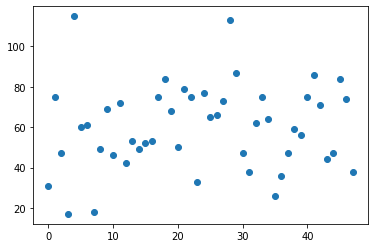

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

print(lengths)
# We simply enumerate the titles, 0 refers to the first title in our dataframe
title_ids = [i for i in range(len(news_content["Title"]))]
plt.plot(title_ids,lengths,'o')

## 8. Dealing with missing data 

You can see that the value NaN occurs quite often. This stands for *Not A Number* and is interpreted as a float. Pandas automatically interprets empty cells as NaN when reading in data. If you do not notice that, it can lead to annoying errors or wrong interpretations. If one value in a column is NaN, the mean and standard deviation will also be NaN. 
One way to deal with the NaN problem is to simply replace them with a default value. In the following example, we replace all NaN values with 0. 

In [ ]:
twitter_content_modified = twitter_content.fillna(0)
twitter_content_modified.describe()

The NaN problem is particularly difficult when we work with String values. Recall that we did not find information about the author for many articles. (Counters were introduced in [chapter 10](https://github.com/cltl/python-for-text-analysis/blob/master/Chapters/Chapter%2010%20-%20Dictionaries.ipynb) of the python course.)

In [ ]:
from collections import Counter

authors = news_content["Author"]

# Count how often each author occurs
frequencies = Counter(authors)

print(frequencies)

If we now want to sort the authors by name, we get a Type Error because NaN is interpreted as a float and not a string. We decide to replace it with a default string: "Unknown" using the function *fillna*.

**For the reproducibility of your analyses, it is very important to be transparent about the handling of missing data. More options can be found in the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).**  

In [ ]:
# Sort the authors by name.
sorted_by_name = sorted(frequencies.items(), key=lambda item: item[0])

print(sorted_by_name)

In [ ]:
# We replace NaN with the default string "Unknown"
modified_authors = authors.fillna("Unknown")

# Count how often each author occurs
frequencies = Counter(modified_authors)
sorted_by_name = sorted(frequencies.items(), key=lambda item: item[0])
sorted_by_frequency = sorted(frequencies.items(), key=lambda item: item[1])
print(sorted_by_name)

Another option is to set the parameter keep_default_na in pd.read_csv() to False. This ensures that empty strings are not interpreted as NaN. Make sure to check the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).